In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
data = ('Resources/finalresults_SQLjoin.csv')
df = pd.read_csv(data)

In [86]:
df.head(10)

age   sexid  height  weight diabetes      smokerid      drinkerid  \
0   43  female   166.4    53.5       no  never smoker  never drinker   
1   34    male   169.0    57.0       no       no info        no info   
2   32  female   157.0    51.0       no       no info        no info   
3   59    male   165.0    63.0       no  never smoker  never drinker   
4   30  female   163.5    48.5       no       no info        no info   
5   41  female   157.0    57.9       no       no info        no info   
6   51  female   170.0    61.8       no       no info        no info   
7   36    male   166.0    66.7       no       no info        no info   
8   31    male   167.0    61.5       no       no info        no info   
9   31    male   161.5    58.5       no  never smoker  never drinker   

                       famhistid   bmi  cholesterol  fpg_finalvisit  
0     family history of diabetes  19.3         5.13            4.97  
1  no family history of diabetes  20.0         4.61            5.50  
2  no family history of diabetes  20.7         4.73            4.90  
3  no family history of diabetes  23.1         4.50            5.50  
4  no family history of diabetes  18.1         3.48            4.82  
5  no family history of diabetes  23.5         3.70            5.00  
6  no family history of diabetes  21.4         4.77            4.80  
7  no family history of diabetes  24.2         4.75            5.32  
8  no family history of diabetes  22.1         3.93            4.80  
9  no family history of diabetes  22.4         4.48            5.10

In [87]:
##Renaming Column Headers
df = df.rename({
'age': 'Age', 
'sexid': 'Gender',
'height': 'Height (cm)',
'weight': 'weight (kg)',
'diabetes': 'Outcome (Type 2 Diabetes)',
'smokerid': 'Smokes',
'drinkerid': 'Drinks Alcohol',
'famhistid': 'Family History of Diabetes',
'bmi': 'BMI',
'cholesterol': 'Cholesterol',
'fpg_finalvisit': 'Fasting Plasma Glucose',

}, axis = 1)

In [88]:
df.head()

Age  Gender  Height (cm)  weight (kg) Outcome (Type 2 Diabetes)  \
0   43  female        166.4         53.5                        no   
1   34    male        169.0         57.0                        no   
2   32  female        157.0         51.0                        no   
3   59    male        165.0         63.0                        no   
4   30  female        163.5         48.5                        no   

         Smokes Drinks Alcohol     Family History of Diabetes   BMI  \
0  never smoker  never drinker     family history of diabetes  19.3   
1       no info        no info  no family history of diabetes  20.0   
2       no info        no info  no family history of diabetes  20.7   
3  never smoker  never drinker  no family history of diabetes  23.1   
4       no info        no info  no family history of diabetes  18.1   

   Cholesterol  Fasting Plasma Glucose  
0         5.13                    4.97  
1         4.61                    5.50  
2         4.73                    4.90  
3         4.50                    5.50  
4         3.48                    4.82

In [89]:
##Changing yes/no values to 1/0
df = df.replace({
    'yes': 1,
    'no': 0,
    'never smoke': 0,
    'no info': np.nan,
    'never drinker': 0,
    'family history of diabetes': 1,
    'no family history of diabetes': 0,
    'current smoker': 1,
    'current drinker': 1,
    'former smoker': 1,
'former drinker': 1,
'never smoker': 0,
'male': 0,
'female': 1



})

In [90]:
df.head()

Age  Gender  Height (cm)  weight (kg)  Outcome (Type 2 Diabetes)  Smokes  \
0   43       1        166.4         53.5                          0     0.0   
1   34       0        169.0         57.0                          0     NaN   
2   32       1        157.0         51.0                          0     NaN   
3   59       0        165.0         63.0                          0     0.0   
4   30       1        163.5         48.5                          0     NaN   

   Drinks Alcohol  Family History of Diabetes   BMI  Cholesterol  \
0             0.0                           1  19.3         5.13   
1             NaN                           0  20.0         4.61   
2             NaN                           0  20.7         4.73   
3             0.0                           0  23.1         4.50   
4             NaN                           0  18.1         3.48   

   Fasting Plasma Glucose  
0                    4.97  
1                    5.50  
2                    4.90  
3                    5.50  
4                    4.82

In [91]:
# drop na
df = df.dropna()
print(len(df))

57595


In [92]:
df.head()

Age  Gender  Height (cm)  weight (kg)  Outcome (Type 2 Diabetes)  Smokes  \
0    43       1        166.4         53.5                          0     0.0   
3    59       0        165.0         63.0                          0     0.0   
9    31       0        161.5         58.5                          0     0.0   
16   25       1        157.0         50.0                          0     0.0   
19   66       0        156.0         60.5                          0     1.0   

    Drinks Alcohol  Family History of Diabetes   BMI  Cholesterol  \
0              0.0                           1  19.3         5.13   
3              0.0                           0  23.1         4.50   
9              0.0                           0  22.4         4.48   
16             0.0                           0  20.3         4.05   
19             0.0                           0  24.9         4.67   

    Fasting Plasma Glucose  
0                     4.97  
3                     5.50  
9                     5.10  
16                    4.85  
19                    6.31

In [93]:
## EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57595 entries, 0 to 202392
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         57595 non-null  int64  
 1   Gender                      57595 non-null  int64  
 2   Height (cm)                 57595 non-null  float64
 3   weight (kg)                 57595 non-null  float64
 4   Outcome (Type 2 Diabetes)   57595 non-null  int64  
 5   Smokes                      57595 non-null  float64
 6   Drinks Alcohol              57595 non-null  float64
 7   Family History of Diabetes  57595 non-null  int64  
 8   BMI                         57595 non-null  float64
 9   Cholesterol                 57595 non-null  float64
 10  Fasting Plasma Glucose      57595 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 5.3 MB


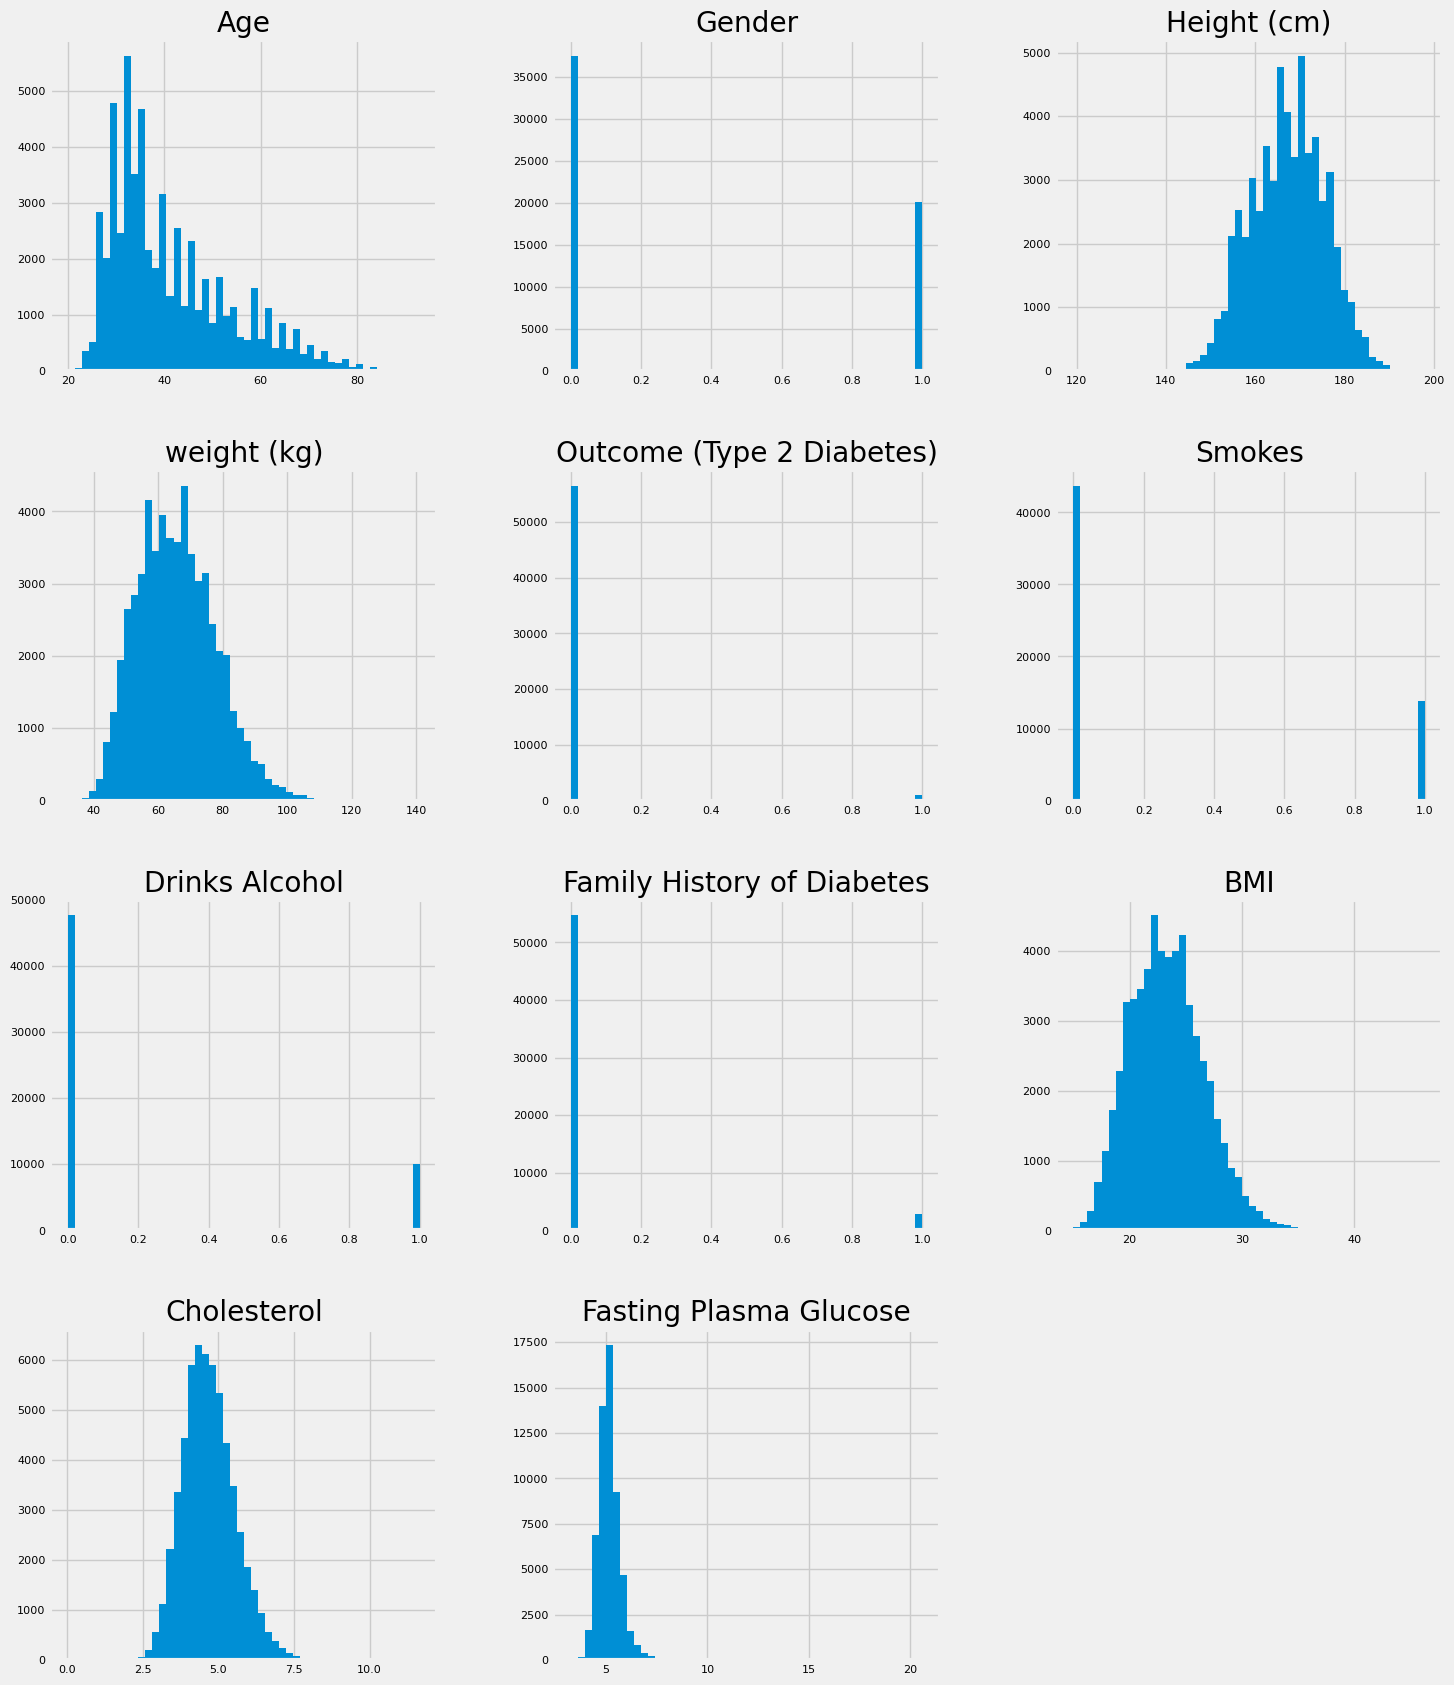

In [94]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [95]:
df.isnull().sum() #checking for total null values

Age                           0
Gender                        0
Height (cm)                   0
weight (kg)                   0
Outcome (Type 2 Diabetes)     0
Smokes                        0
Drinks Alcohol                0
Family History of Diabetes    0
BMI                           0
Cholesterol                   0
Fasting Plasma Glucose        0
dtype: int64

In [96]:
## Diabetes by gender
df.groupby(['Gender','Outcome (Type 2 Diabetes)'])['Outcome (Type 2 Diabetes)'].count()

Gender  Outcome (Type 2 Diabetes)
0       0                            36681
        1                              855
1       0                            19837
        1                              222
Name: Outcome (Type 2 Diabetes), dtype: int64

In [97]:
## Diabetes by Age
df.groupby(['Age','Outcome (Type 2 Diabetes)'])['Outcome (Type 2 Diabetes)'].count()

Age  Outcome (Type 2 Diabetes)
20   0                              7
21   0                             25
22   0                             52
23   0                             98
24   0                            252
                                 ... 
89   0                              4
90   0                              4
91   0                              2
92   0                              5
93   0                              5
Name: Outcome (Type 2 Diabetes), Length: 135, dtype: int64

In [98]:
cholesterol_count = df.Cholesterol.value_counts()
cholesterol_count

4.00     584
5.00     519
4.60     481
4.30     472
4.40     443
        ... 
8.53       1
8.49       1
11.31      1
1.72       1
8.46       1
Name: Cholesterol, Length: 631, dtype: int64

<AxesSubplot:ylabel='Density'>

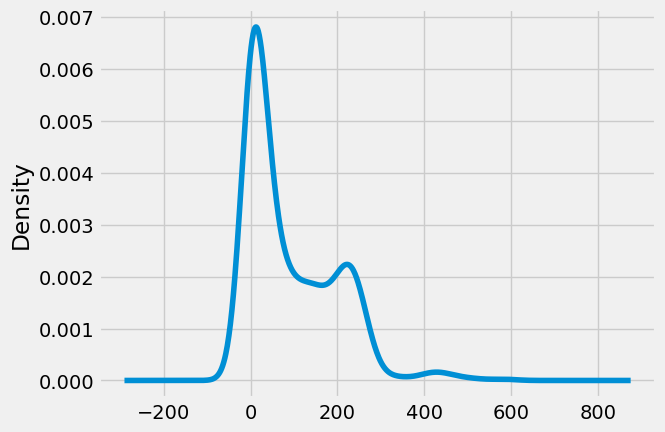

In [99]:
cholesterol_count.plot.density()

In [100]:
bmi_count = df.BMI.value_counts()

<AxesSubplot:ylabel='Density'>

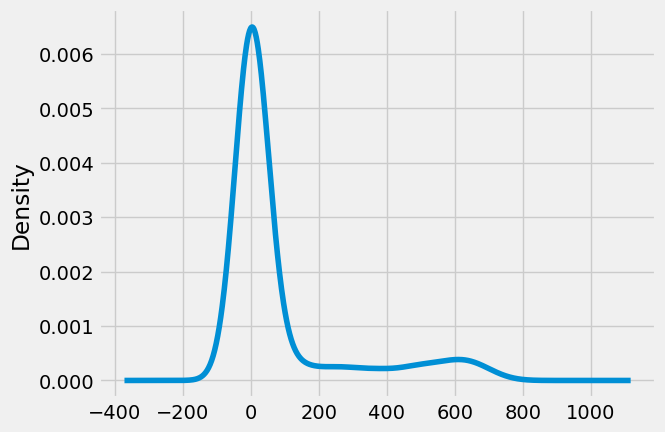

In [101]:
bmi_count.plot.density()

In [102]:
pd.crosstab(df.Age,df.BMI,margins=True).style.background_gradient(cmap='summer_r')

In [103]:
## Saving Clean CSV 
df.to_csv('Resources/clean_data_final_week1.csv', sep=',', index=False, header='True')